In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

import os
import re
import time
import datetime as dt # 사용시 datetime.dt 로 사용 # 현재 시간 사용
from datetime import datetime # 사용시 함수로 바로 사용 #-> 시간 비교

In [ ]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!ls /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [ ]:
df_suggestion = pd.read_excel("../content/drive/MyDrive/Project/summonerswar/df_suggestion.xlsx", index_col=0)
df_suggestion

,title,url,date,like
0,pc 클라에서 앱을 실행할 때 주황색 알림 비활성화 옵션 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,00:33,0
1,콜라보레이션 몬스터도 형상변환 가능하게 만들어주세요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.21.,0
2,2각 몬스터 스작 좀 없애주시면 안되나요?,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.21.,0
3,아레나 초기화주에 어떻게좀해봐요,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.20.,0
4,섬꾸미게 검정색 장식좀만들어줘,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.19.,0
...,...,...,...,...
6713,변두리서버에 소수의 의견도 의견입니다 아이린님,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0
6714,어찌 잠잠하다했다 폭주시발덱보정 ㅅㅂ,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0
6715,고대 룬 질문드립니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0
6716,"물극지,풍하프버그/ 물발키리/ 실레나보상,상점패치좀해주세요",https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0


## 데이터 전처리

In [ ]:
df_suggestion

,title,url,date,like
0,pc 클라에서 앱을 실행할 때 주황색 알림 비활성화 옵션 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,00:33,0
1,콜라보레이션 몬스터도 형상변환 가능하게 만들어주세요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.21.,0
2,2각 몬스터 스작 좀 없애주시면 안되나요?,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.21.,0
3,아레나 초기화주에 어떻게좀해봐요,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.20.,0
4,섬꾸미게 검정색 장식좀만들어줘,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.19.,0
...,...,...,...,...
6713,변두리서버에 소수의 의견도 의견입니다 아이린님,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0
6714,어찌 잠잠하다했다 폭주시발덱보정 ㅅㅂ,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0
6715,고대 룬 질문드립니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0
6716,"물극지,풍하프버그/ 물발키리/ 실레나보상,상점패치좀해주세요",https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0


In [ ]:
# date를 datetime으로 변환
df_suggestion["year"] = pd.to_datetime(df_suggestion["date"])

<ipython-input-6-bdc7136ffd5b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_suggestion["year"] = pd.to_datetime(df_suggestion["date"])


In [ ]:
# datetime을 연도로 변환
df_suggestion["year"]=df_suggestion["year"].dt.year

In [ ]:
df_suggestion.head()

,title,url,date,like,year
0,pc 클라에서 앱을 실행할 때 주황색 알림 비활성화 옵션 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,00:33,0,2024
1,콜라보레이션 몬스터도 형상변환 가능하게 만들어주세요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.21.,0,2024
2,2각 몬스터 스작 좀 없애주시면 안되나요?,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.21.,0,2024
3,아레나 초기화주에 어떻게좀해봐요,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.20.,0,2024
4,섬꾸미게 검정색 장식좀만들어줘,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.19.,0,2024


## 데이터 확인

In [ ]:
df_suggestion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 6717
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6718 non-null   object
 1   url     6718 non-null   object
 2   date    6718 non-null   object
 3   like    6718 non-null   int64 
 4   year    6718 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 546.7+ KB


In [ ]:
pd.DataFrame(df_suggestion["year"].value_counts())

,count
year,
2020,2278
2021,1422
2022,1167
2023,1129
2024,722


In [ ]:
pd.DataFrame(df_suggestion["like"].value_counts()).sort_values(by="like",ascending=False)

,count
like,
68,1
39,1
31,1
30,1
23,1
20,1
17,1
15,2
14,1


## 연도별 어떤 키워드가 많이 나왔는지 확인(워드클라우드)

In [ ]:
pip install konlpy

In [ ]:
from konlpy.tag import Okt

# Okt 객체 생성
okt = Okt()

# 명사 추출 함수
def extract_nouns(text):
    nouns = okt.nouns(text)
    return nouns

# title 컬럼에서 명사 추출
df_suggestion['title_nouns'] = df_suggestion['title'].apply(extract_nouns)
df_suggestion

,title,url,date,like,year,title_nouns
0,pc 클라에서 앱을 실행할 때 주황색 알림 비활성화 옵션 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,00:33,0,2024,"[앱, 실행, 때, 주황색, 알림, 비, 활성화, 옵션, 건의]"
1,콜라보레이션 몬스터도 형상변환 가능하게 만들어주세요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.21.,0,2024,"[콜라보레이션, 몬스터, 형상, 변환]"
2,2각 몬스터 스작 좀 없애주시면 안되나요?,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.21.,0,2024,"[각, 몬스터, 스작, 좀]"
3,아레나 초기화주에 어떻게좀해봐요,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.20.,0,2024,"[아레나, 초기, 화주, 좀]"
4,섬꾸미게 검정색 장식좀만들어줘,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.19.,0,2024,"[섬, 검정색, 장식, 좀]"
...,...,...,...,...,...,...
6713,변두리서버에 소수의 의견도 의견입니다 아이린님,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0,2020,"[변두리, 서버, 소수, 의견, 의견, 아이린]"
6714,어찌 잠잠하다했다 폭주시발덱보정 ㅅㅂ,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0,2020,"[어찌, 폭주, 시발, 덱, 보정]"
6715,고대 룬 질문드립니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0,2020,"[고대, 룬, 질문]"
6716,"물극지,풍하프버그/ 물발키리/ 실레나보상,상점패치좀해주세요",https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0,2020,"[물, 하프, 버그, 물, 발키리, 실, 레나, 보상, 상점, 패치, 좀]"


In [ ]:
df_suggestion_2024 = df_suggestion.query("year == 2024")
df_suggestion_2023 = df_suggestion.query("year == 2023")
df_suggestion_2022 = df_suggestion.query("year == 2022")
df_suggestion_2021 = df_suggestion.query("year == 2021")
df_suggestion_2020 = df_suggestion.query("year == 2020")

In [ ]:
list_words_2020 = sum(df_suggestion_2020["title_nouns"].to_list(),[])
list_words_2021 = sum(df_suggestion_2021["title_nouns"].to_list(),[])
list_words_2022 = sum(df_suggestion_2022["title_nouns"].to_list(),[])
list_words_2023 = sum(df_suggestion_2023["title_nouns"].to_list(),[])
list_words_2024 = sum(df_suggestion_2024["title_nouns"].to_list(),[])

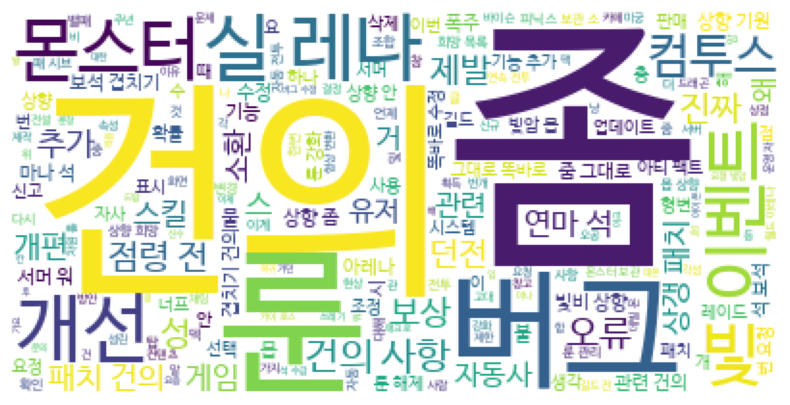

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 리스트에서 단어들을 하나의 문자열로 합치기
text = ' '.join(list_words_2020)

# 워드클라우드 생성
wordcloud = WordCloud(background_color="white", font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordcloud.generate_from_text(text)  # 기존 text를 집어넣고 교육

# wordcloud.words_  # 요소별 비율 표시  # 관사는 사라짐

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # 축 숨기기
plt.show()

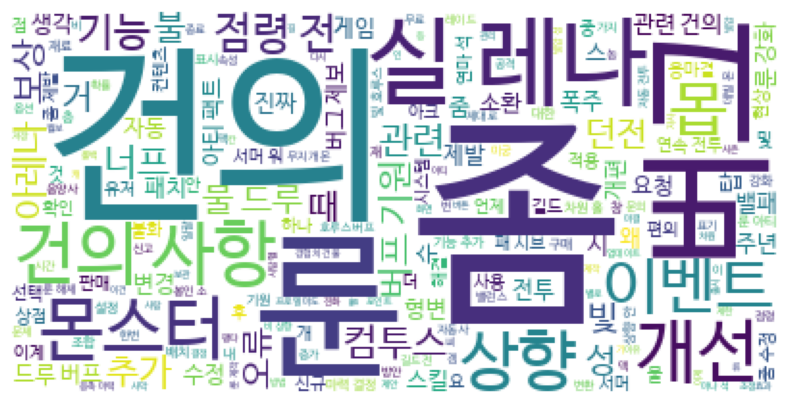

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 리스트에서 단어들을 하나의 문자열로 합치기
text = ' '.join(list_words_2021)

# 워드클라우드 생성
wordcloud = WordCloud(background_color="white", font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordcloud.generate_from_text(text)  # 기존 text를 집어넣고 교육

# wordcloud.words_  # 요소별 비율 표시  # 관사는 사라짐

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # 축 숨기기
plt.show()

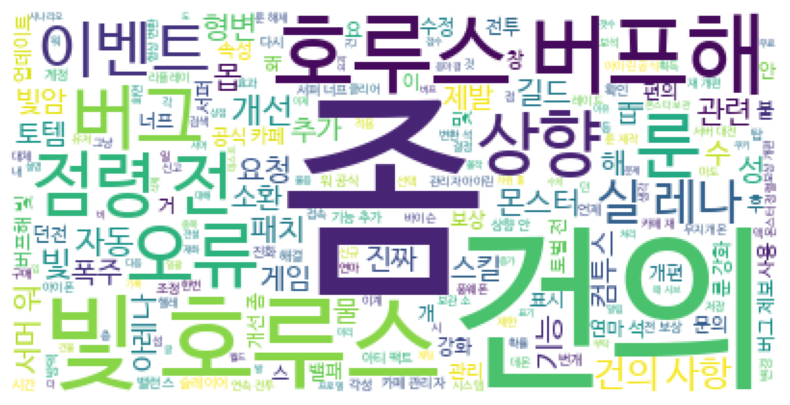

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 리스트에서 단어들을 하나의 문자열로 합치기
text = ' '.join(list_words_2022)

# 워드클라우드 생성
wordcloud = WordCloud(background_color="white", font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordcloud.generate_from_text(text)  # 기존 text를 집어넣고 교육

# wordcloud.words_  # 요소별 비율 표시  # 관사는 사라짐

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # 축 숨기기
plt.show()

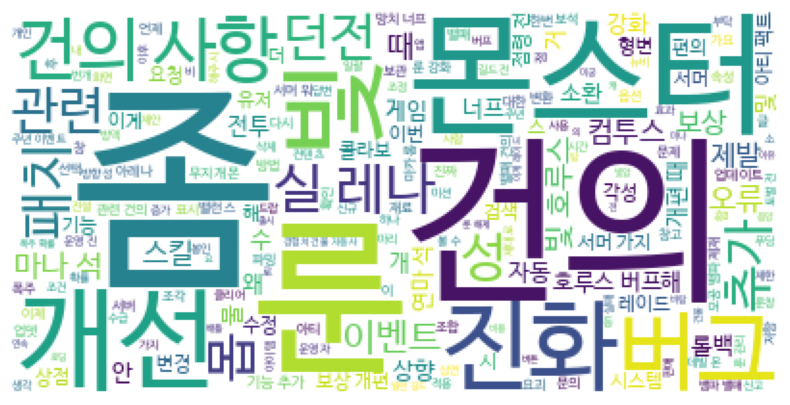

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 리스트에서 단어들을 하나의 문자열로 합치기
text = ' '.join(list_words_2023)

# 워드클라우드 생성
wordcloud = WordCloud(background_color="white", font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordcloud.generate_from_text(text)  # 기존 text를 집어넣고 교육

# wordcloud.words_  # 요소별 비율 표시  # 관사는 사라짐

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # 축 숨기기
plt.show()

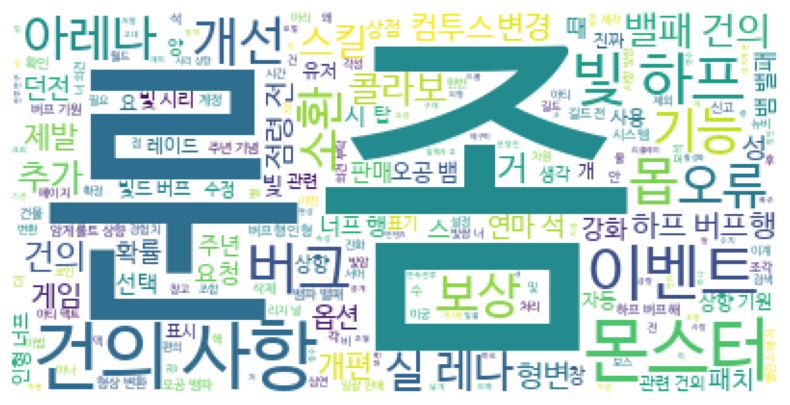

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 리스트에서 단어들을 하나의 문자열로 합치기
text = ' '.join(list_words_2024)

# 워드클라우드 생성
wordcloud = WordCloud(background_color="white", font_path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordcloud.generate_from_text(text)  # 기존 text를 집어넣고 교육

# wordcloud.words_  # 요소별 비율 표시  # 관사는 사라짐

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')  # 축 숨기기
plt.show()

## 워드클라우드 결과

- 2020년

폭주, 호루스 버프, 물드루이드 버프, 던전, 개편, 연속전투, 룬강화
아레나 , 너프

- 2021년

룬, 버그, 점령전, 실레나, 물드루, 던전, 룬강화, 폭주, 룬강화,
기능추가, 연속전투


- 2022년

빛호루스, 점령전, 자동전투, 버그, 폭주, 실레나 형변, 너프

- 2023년

룬, 점령전, 실레나, 던전, 아티팩트, 레이드, 빛호루스, 롤백,진화,
마나석

- 2024년

룬, 실레나, 밸패, 점령전, 인형너프 빛시리, 빛드버프, 빛하프, 오공, 뱀파이어, 암게롤트 상향, 버프기원, 하프 버프행, 형변

## 인사이트 결과

- 몬스터에 대한 밸런스 패치는 매년 나오고 있는 건의사항임.
그러나 과거에 비해 몬스터 상향,하향에 관한 글은 빈도가 잦아지고 있음

- 과거에는 룬강화, 연속전투, 자동전투 등에 대한 불만이 잦음. -> 이는 현재까지의 업데이트로 인해 잘 해결된 것으로 보임.

- 폭주룬에 대해서는 끊임없이 불만이 많은 것을 확인.-> 매년 해결이 되지 않는 모습을 보인다

- 형상변환에 대해서는 어떤 불만이 많은 것인지 자세한 확인이 불가.

- 실시간 아레나와 같은 부분에서도 건의사항이 많은데 직접 플레이해본 결과 몬스터 밸런스 또는 폭주가 연관이 깊을 것으로 보임.

## 3가지 진행 방안

1. 좋아요 수를 기준으로 많은 유저들의 공감을 이끌어낸 건의사항을 분석

2. "폭주 키워드" 에 대해 어떤 건의를 하고 있는지

3. "실시간 아레나" 에 대해 어떤 건의를 하고 있는지